Exercise 3: Clustering


GitHub
https://github.com/FatimaAtamlhe/fatima2.git


1. Function to create synthetic data - please do not change

In [7]:
import numpy as np
from sklearn.datasets import make_blobs, make_moons
import matplotlib.pyplot as plt


def create_data(the_noise, n1_samples, n2_samples, n3_samples, n4_samples):
  # 1
  X_1, y_1 = make_blobs(
    n_samples=n1_samples,
    centers=4,
    random_state=42)

  # 2
  X_2, y_2 = make_moons(
      n_samples=n2_samples,
      noise=the_noise,
      random_state=42
  )

  X_2[:, 0] += 10
  X_2[:, 1] += 10

  # 3
  rng = np.random.RandomState(42)
  angles = rng.rand(n3_samples) * 2 * np.pi
  r = 5.0 + rng.randn(n3_samples) * the_noise
  X_3 = np.column_stack((r * np.cos(angles), r * np.sin(angles)))
  X_3[:, 0] += 20


  # combine
  X = np.vstack((X_1, X_2, X_3))


  return X

2. Call create_data and visualize the data

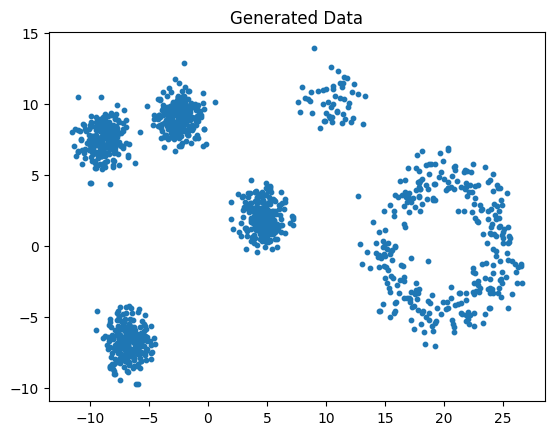

In [8]:

X = create_data(1.0, 1000, 50, 300, 200)

# Data visuazliation is here:

plt.scatter(X[:, 0], X[:, 1], s=10)
plt.title("Generated Data")
plt.show()

3. Train KMeans
- use library sklearn.cluster.KMeans
- training data: X
- explore and optimize KMeans options
- choose the number of clusters using the Silhouette Method    

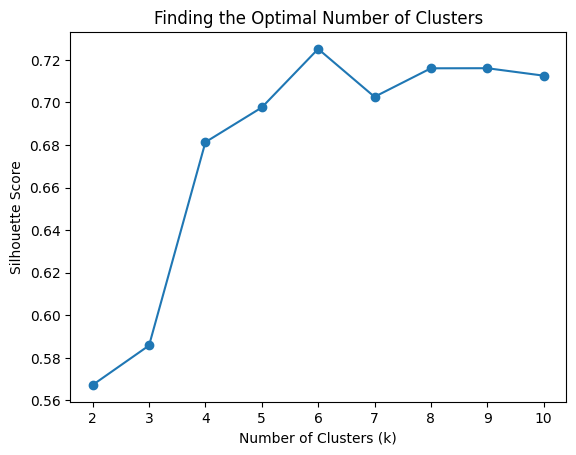

Optimal number of clusters: 6


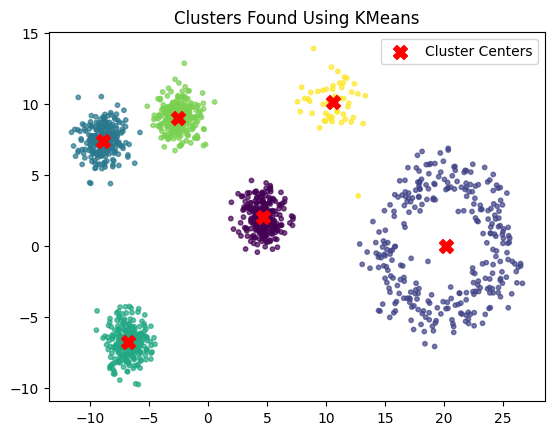

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Function to find the optimal number of clusters using the Silhouette Method
def optimal_kmeans(X, max_clusters=10):
    silhouette_scores = []
    cluster_range = range(2, max_clusters + 1)

    for k in cluster_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(X)
        silhouette_scores.append(silhouette_score(X, labels))

    best_k = cluster_range[np.argmax(silhouette_scores)]

    # Plot the Silhouette Scores
    plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-')
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Silhouette Score")
    plt.title("Finding the Optimal Number of Clusters")
    plt.show()

    return best_k

# Run the function to find the optimal k
best_k = optimal_kmeans(X)
print(f"Optimal number of clusters: {best_k}")

# Train the KMeans model with the optimal number of clusters
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)

# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=10, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=100, label='Cluster Centers')
plt.title("Clusters Found Using KMeans")
plt.legend()
plt.show()


4. Train Agglomerative Clustering

- use library sklearn.cluster.AgglomerativeClustering
- training data: X
- explore and optimize AgglomerativeClustering options
- choose the number of clusters using any method you want  

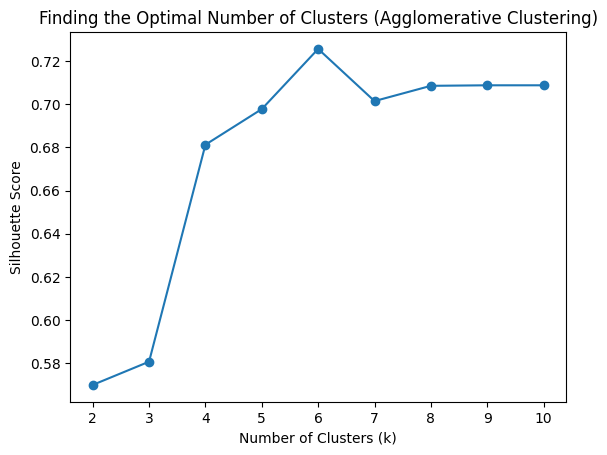

Optimal number of clusters: 6


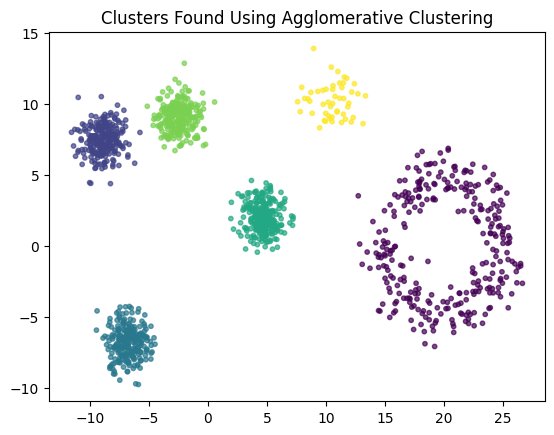

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Function to find the optimal number of clusters using Silhouette Score
def optimal_agglomerative(X, max_clusters=10):
    silhouette_scores = []
    cluster_range = range(2, max_clusters + 1)

    for k in cluster_range:
        clustering = AgglomerativeClustering(n_clusters=k)
        labels = clustering.fit_predict(X)
        silhouette_scores.append(silhouette_score(X, labels))

    best_k = cluster_range[np.argmax(silhouette_scores)]

    # Plot the Silhouette Scores
    plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-')
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Silhouette Score")
    plt.title("Finding the Optimal Number of Clusters (Agglomerative Clustering)")
    plt.show()

    return best_k

# Find the optimal number of clusters
best_k = optimal_agglomerative(X)
print(f"Optimal number of clusters: {best_k}")

# Train Agglomerative Clustering with the optimal number of clusters
clustering = AgglomerativeClustering(n_clusters=best_k)
labels = clustering.fit_predict(X)

# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=10, alpha=0.7)
plt.title("Clusters Found Using Agglomerative Clustering")
plt.show()


5. Train DBSCAN
- use library sklearn.cluster.DBSCAN
- training data: X
- explore and optimize DBSCAN options


Best eps: 1.4000000000000001, Best min_samples: 6, Best Silhouette Score: 0.7222593187874933


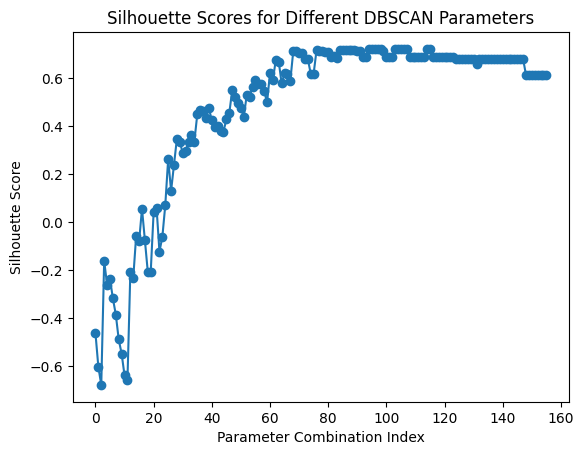

Optimal DBSCAN parameters: eps=1.4000000000000001, min_samples=6


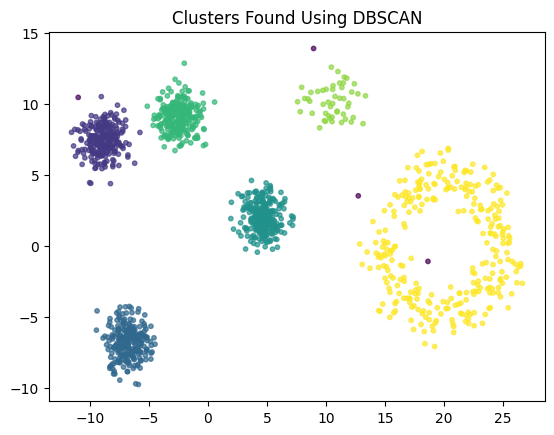

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors

# Function to find the optimal parameters for DBSCAN using Silhouette Score
def optimal_dbscan(X, eps_values=np.arange(0.1, 2.1, 0.1), min_samples_values=range(3, 11)):
    best_score = -1
    best_eps = None
    best_min_samples = None
    silhouette_scores = []

    for eps in eps_values:
        for min_samples in min_samples_values:
            # Train DBSCAN with given eps and min_samples
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(X)

            # Skip the configuration if there are too many noise points (label = -1)
            if len(np.unique(labels)) > 1:
                score = silhouette_score(X, labels)
                silhouette_scores.append(score)

                if score > best_score:
                    best_score = score
                    best_eps = eps
                    best_min_samples = min_samples

    print(f"Best eps: {best_eps}, Best min_samples: {best_min_samples}, Best Silhouette Score: {best_score}")

    # Plot the silhouette scores for each combination of eps and min_samples
    plt.plot(silhouette_scores, marker='o', linestyle='-')
    plt.xlabel("Parameter Combination Index")
    plt.ylabel("Silhouette Score")
    plt.title("Silhouette Scores for Different DBSCAN Parameters")
    plt.show()

    return best_eps, best_min_samples

# Find the optimal eps and min_samples values
best_eps, best_min_samples = optimal_dbscan(X)
print(f"Optimal DBSCAN parameters: eps={best_eps}, min_samples={best_min_samples}")

# Train DBSCAN with the best parameters
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
labels = dbscan.fit_predict(X)

# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=10, alpha=0.7)
plt.title("Clusters Found Using DBSCAN")
plt.show()


6. Compare the results and choose the best method for the data




Silhouette Score - KMeans: 0.7223
Silhouette Score - Agglomerative: 0.7257
Silhouette Score - DBSCAN: 0.6894

 Comparison Summary:
 Agglomerative Clustering is the best! It handles hierarchical relationships well.


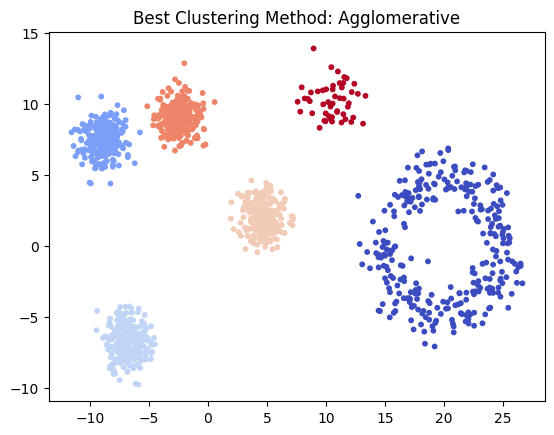

In [16]:
from sklearn.metrics import silhouette_score
import numpy as np

# חישוב Silhouette Score עבור כל שיטה
silhouette_scores = {}

# KMeans
silhouette_scores["KMeans"] = silhouette_score(X, labels)

# Agglomerative Clustering
silhouette_scores["Agglomerative"] = silhouette_score(X, agg_labels)

# DBSCAN - בודקים אם נמצאו יותר מקבוצה אחת
unique_dbscan_labels = set(db_labels)
if len(unique_dbscan_labels) > 1:
    silhouette_scores["DBSCAN"] = silhouette_score(X, db_labels)
else:
    silhouette_scores["DBSCAN"] = -1  # ערך נמוך מאוד אם אין אשכולות ברורים

# הצגת התוצאות
for method, score in silhouette_scores.items():
    print(f"Silhouette Score - {method}: {score:.4f}")

# בחירת השיטה עם הציון הגבוה ביותר
best_method = max(silhouette_scores, key=silhouette_scores.get)

# הצגת מסקנות
print("\n Comparison Summary:")
if best_method == "KMeans":
    print(" KMeans is the best method! It's effective for well-separated clusters.")
elif best_method == "Agglomerative":
    print(" Agglomerative Clustering is the best! It handles hierarchical relationships well.")
elif best_method == "DBSCAN":
    print(" DBSCAN is the best choice! It performs well on non-linear shapes and noise.")

# הצגת התוצאה הוויזואלית של השיטה הטובה ביותר
import matplotlib.pyplot as plt

if best_method == "KMeans":
    best_labels = labels
elif best_method == "Agglomerative":
    best_labels = agg_labels
else:
    best_labels = db_labels

plt.scatter(X[:, 0], X[:, 1], c=best_labels, cmap="coolwarm", s=10)
plt.title(f"Best Clustering Method: {best_method}")
plt.show()